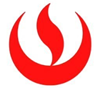

<h3 align="center">Inteligencia Artificial - WS7A</h3>

## Mapas autoorganizados (SOM) - Entrenamiento a partir de Colores RGB

## Objetivo

En el siguiente notebook entrenaremos una red SOM a partir de colores aleatorios.  El objetivo es poder entrenar una cuadrícula SOM y visualizar fácilmente cómo se organizan varios colores similares en celdas vecinas.  

Usaremos un ejemplo de ***color RGB*** para entrenar el SOM y demostrar su rendimiento y uso típico.

Fuente: https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/


## Resumen - Teoría sobre Mapas Autoorganizados (SOM)

* Un mapa autoorganizado fue introducido por primera vez por **Teuvo Kohonen** en 1982 y a veces también se lo conoce como **mapa de Kohonen**.

* Es un tipo especial de red neuronal artificial, que crea un mapa de los datos de entrenamiento. 

* El mapa es generalmente una cuadrícula rectangular 2D de pesos, pero puede extenderse a un modelo 3D o de mayor dimensión. También son posibles otras estructuras de rejilla como rejillas hexagonales.

* Un SOM se utiliza principalmente para la visualización de datos y proporciona un resumen visual rápido de las instancias de formación.

* En una cuadrícula rectangular 2D, cada celda está representada por un vector de peso. Para un SOM entrenado, cada peso de celda representa un resumen de algunos ejemplos de entrenamiento. 

* Las celdas cercanas entre sí tienen pesos similares y los ejemplos similares se pueden asignar a celdas en una pequeña vecindad entre sí.



La siguiente figura es una ilustración aproximada de la estructura del SOM:

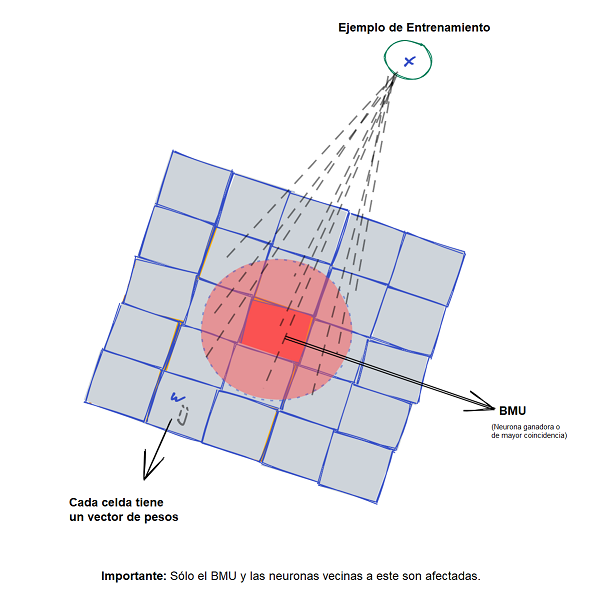

**IMPORTANTE:**

* Un SOM se capacita mediante el aprendizaje competitivo.

* El **aprendizaje competitivo** es una forma de **aprendizaje no supervisado**, donde los elementos constitutivos compiten para producir un resultado satisfactorio, y **solo uno** puede ganar la competencia.

**PROCEDIMIENTO Y ALGORITMO DE ENTRENAMIENTO DE UN SOM**

**Procedimiento**

* Cuando se ingresa un ejemplo de entrenamiento en la cuadrícula, se determina la Mejor Unidad de Coincidencia (BMU o **Best Matching Unit** o ganador de la competencia). La UMB es la celda cuyos pesos se acercan más al ejemplo de entrenamiento (tienen la distancia más corta hacia el vector de entrenamiento).

* A continuación, los pesos de la BMU y los pesos de las neuronas vecinas a la BMU se ajustan para acercarse a la instancia de entrenamiento de entrada.

**Algoritmo de Entrenamiento**

1. Inicializar todos los pesos de cuadrícula del SOM
2. Repetir hasta alcanzar la convergencia (minimizar la distancia hasta el vector de entrada) o alcanzar las épocas (iteracciones) máximas.

   2.1. Mezclar los ejemplos de entrenamiento
   
   2.2. Para cada instancia de entrenamiento X
   
        2.2.1. Encontrar la unidad BMU que mejor se adapte
        2.2.2. Actualizar el vector de peso de BMU y sus neuronas vecinas

Los tres pasos para la **inicialización, la búsqueda de la BMU y la actualización de los pesos** se explican en las siguientes secciones.

### Conceptos importantes

#### (a) La distancia menor desde una neurona hacia la entrada

Como se mencionó anteriormente, la mejor unidad de coincidencia es la celda de la cuadrícula SOM que está más cerca del ejemplo de entrenamiento X. Un método para encontrar esta unidad es calcular la **distancia euclidiana** de X del peso de cada celda (neurona) de la cuadrícula.  La celda con la distancia mínima se puede elegir como la BMU.

Un punto importante a tener en cuenta es que la distancia euclidiana no es el único método posible para seleccionar la UMB. También se puede usar una medida de distancia alternativa o una métrica de similitud para determinar la BMU, y elegir esto depende principalmente de los datos y el modelo que está construyendo específicamente.

#### (b) La tasa de aprendizaje

La tasa de aprendizaje es una constante en el rango [0,1] y determina el tamaño de paso del vector de peso hacia el ejemplo de entrenamiento de entrada.  Para una tasa de aprendizaje 0, no hay cambio en el peso, y cuando es 1 el vector de peso Wij tomará el valor de X.  

La tasa de aprendizaje se mantiene alta al principio y decae a medida que avanzan las épocas (iteraciones). Una estrategia para reducir la tasa de aprendizaje durante la fase de entrenamiento es utilizar el decaimiento exponencial (tasa de decaimiento).

Para comprender cómo cambia la tasa de aprendizaje con la tasa de decaimiento, grafiquemos la tasa de aprendizaje contra varias épocas cuando la tasa de aprendizaje inicial se establece en uno:

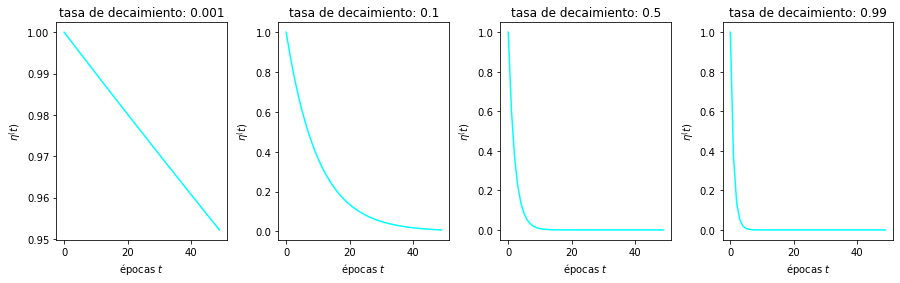

In [12]:
epochs = np.arange(0, 50)
lr_decay = [0.001, 0.1, 0.5, 0.99]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for decay, ind in zip(lr_decay, plt_ind):
    plt.subplot(ind)
    learn_rate = np.exp(-epochs * decay)
    plt.plot(epochs, learn_rate, c='cyan')
    plt.title('tasa de decaimiento: ' + str(decay))
    plt.xlabel('épocas $t$')
    plt.ylabel('$\eta^(t)$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

#### (c) La distancia del vecindario

Un ejemplo de entrenamiento, solo afecta a la BMU y las neuronas cercanas a la BMU. A medida que nos alejamos de la BMU, el cambio de peso se vuelve cada vez menor hasta que es insignificante.

Un valor de radio alto afecta a un mayor número de neuronas y un radio más pequeño afecta solo a la BMU. Una estrategia común es comenzar con un radio grande y reducirlo a medida que avanzan las épocas (iteraciones).

La tasa de caída correspondiente al radio tiene el mismo efecto sobre el radio que la tasa de caída correspondiente a la tasa de aprendizaje. Para obtener una visión más profunda del comportamiento de la función de vecindad, grafiquemos con la distancia para diferentes valores del radio. Un punto a tener en cuenta en estos gráficos es que la función de distancia se acerca a un valor cercano a cero cuando el radio es menor igual a 10.

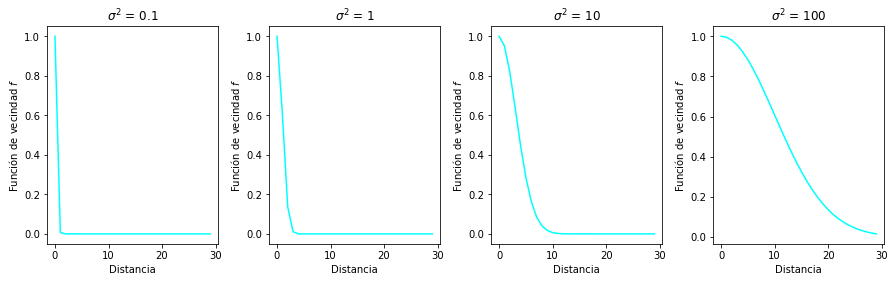

In [13]:
distance = np.arange(0, 30)
sigma_sq = [0.1, 1, 10, 100]
fig,ax = plt.subplots(nrows=1, ncols=4, figsize=(15,4))
plt_ind = np.arange(4) + 141
for s, ind in zip(sigma_sq, plt_ind):
    plt.subplot(ind)
    f = np.exp(-distance ** 2 / 2 / s)
    plt.plot(distance, f, c='cyan')
    plt.title('$\sigma^2$ = ' + str(s))
    plt.xlabel('Distancia')
    plt.ylabel('Función de vecindad $f$')
fig.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

#### (c) Actualización del vector de peso de BMU y células vecinas

Un ejemplo de entrenamiento X se conecta con varias celdas de la cuadrícula SOM tirando de los pesos de estas celdas hacia ella. El cambio máximo se produce en la BMU y la influencia de X disminuye a medida que nos alejamos de la BMU en la cuadrícula SOM.

### Implementación de un Mapa Autoorganizado

Importamos las librerias a utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Como no hay una rutina incorporada para un SOM en la biblioteca de aprendizaje automático estándar de facto, **Scikit-Learn**, realizaremos una implementación rápida manualmente usando **NumPy**.

Implementaremos el SOM como una **mxn** cuadrícula 2D , por lo que necesitaremos una matriz NumPy 3D. La tercera dimensión es necesaria para almacenar los pesos en cada celda.

Definiremos las siguientes tres funciones:

* **find_BMU(SOM,x)**, que retorna el indice del BMU en el mapa.  Devuelve las coordenadas de la celda de la cuadrícula de la mejor unidad coincidente cuando se le da la SOM cuadrícula y un ejemplo de entrenamiento x. Calcula el cuadrado de la distancia euclidiana entre cada peso de celda x y **devuelve (g,h)**, es decir, las **coordenadas de la celda con la distancia mínima**.

* **date_weights(SOM, train_ex, learn_rate, radius_sq,BMU_coord, step=3)**, que actualiza los pesos de las neuronas del SOM cuando se le proporciona una entrada de entrenamiento y los parámetros del modelo (tasa de aprendizaje y radio), junto con las coordenadas de la UMB como una tupla y el parámetro step.  El parámetro step  specifica el número máximo de celdas a la izquierda, derecha, arriba y abajo para cambiar al actualizar los pesos.

* **train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, lr_decay = .1, radius_decay = .1, epochs = 10)**, es la rutina principal para el entrenamiento de una SOM. Requiere una cuadrícula SOM inicializada o una cuadrícula parcialmente entrenada como parámetro.  

In [8]:
# Devuelve el índice (g, h) de la UMB en la cuadrícula
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Actualice los pesos de las celdas SOM cuando se le da un solo ejemplo de entrenamiento
# y los parámetros del modelo junto con las coordenadas de la UMB como una tupla
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #si el radio es cercano a cero, solo se cambia la UMB
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Cambiar todas las células en un pequeño vecindario del BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Rutina principal para el entrenamiento de una MOS. Requiere una cuadrícula SOM inicializada
# o una cuadrícula parcialmente entrenada como parámetro
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Actualizar la tasa y el radio de aprendizaje
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

A partir de la implementación de estas tres funciones, podremos entrenar un SOM utilizando como datos de entrenamiento algunos colores aleatorios. Al entrenar una cuadrícula SOM, visualizaremos fácilmente cómo se organizan varios colores similares en celdas vecinas.

Las celdas alejadas entre sí tienen diferentes colores.

#### Paso #1: Inicializar todos los pesos de cuadrícula del SOM

Todos los pesos de la cuadrícula de SOM se pueden inicializar aleatoriamente. Los pesos de la cuadrícula de SOM también se pueden inicializar mediante ejemplos elegidos aleatoriamente del conjunto de datos de entrenamiento.  En este ejercicio nos ceñiremos a la **inicialización aleatoria**.

El siguiente código inicializa una matriz de datos de entrenamiento y una cuadrícula SOM con colores RGB aleatorios.

In [10]:
# Dimensiones de la cuadrícula SOM
m = 10
n = 10
# Número de ejemplos para entrenamiento (filas)
n_x = 3000
rand = np.random.RandomState(0)
# Inicializar los datos de entrenamiento
train_data = rand.randint(0, 255, (n_x, 3))
# Inicializar el SOM aleatoriamente
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)

A continuación se muestra los datos de entrenamiento y la cuadrícula SOM inicializada aleatoriamente. Debemos tener en cuenta que la matriz de entrenamiento es una matriz de 3000x3, sin embargo, la hemos remodelado a una matriz de 50x60x3 para la visualización:

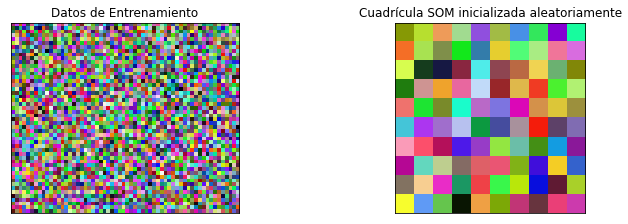

In [11]:
# Muestra tanto la matriz de entrenamiento como la cuadrícula de SOM
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Datos de Entrenamiento')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Cuadrícula SOM inicializada aleatoriamente')

Entrenemos ahora el SOM y verifiquémoslo cada 5 épocas como una descripción general rápida de su progreso:

#### Paso #2 y #3: Entrenamiento SOM

Ejecutemos la función **train_SOM()** en una matriz de datos de entrenamiento llena de colores RGB aleatorios.

Esta funcion, por cada iteracion o epoca, encontrara la unidad BMU (o neurona ganadora) y actualizará el vector de peso de BMU y sus neuronas vecinas.

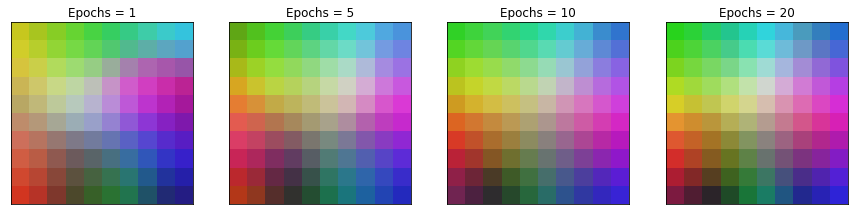

In [6]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

El ejemplo anterior es muy interesante ya que muestra cómo la cuadrícula organiza automáticamente los colores RGB para que varios tonos del mismo color estén juntos en la cuadrícula SOM. El arreglo tiene lugar desde la primera época, pero no es ideal. Podemos ver que la SOM converge en alrededor de 10 épocas y hay menos cambios en las épocas posteriores.

#### ¿Cómo visualizamos el efecto de la tasa de aprendizaje y el radio?

Para ver cómo varía la **tasa de aprendizaje** para diferentes tasas y **radios de aprendizaje**, podemos ejecutar el SOM durante 10 épocas al comenzar desde la misma cuadrícula inicial. 

El siguiente código entrena el SOM para tres valores diferentes de la tasa de aprendizaje y tres radios diferentes.

El SOM se renderiza(*) después de 5 épocas para cada simulación:

(*) busca tener una apariencia realista desde cualquier perspectiva al agrupar varios colores similares.

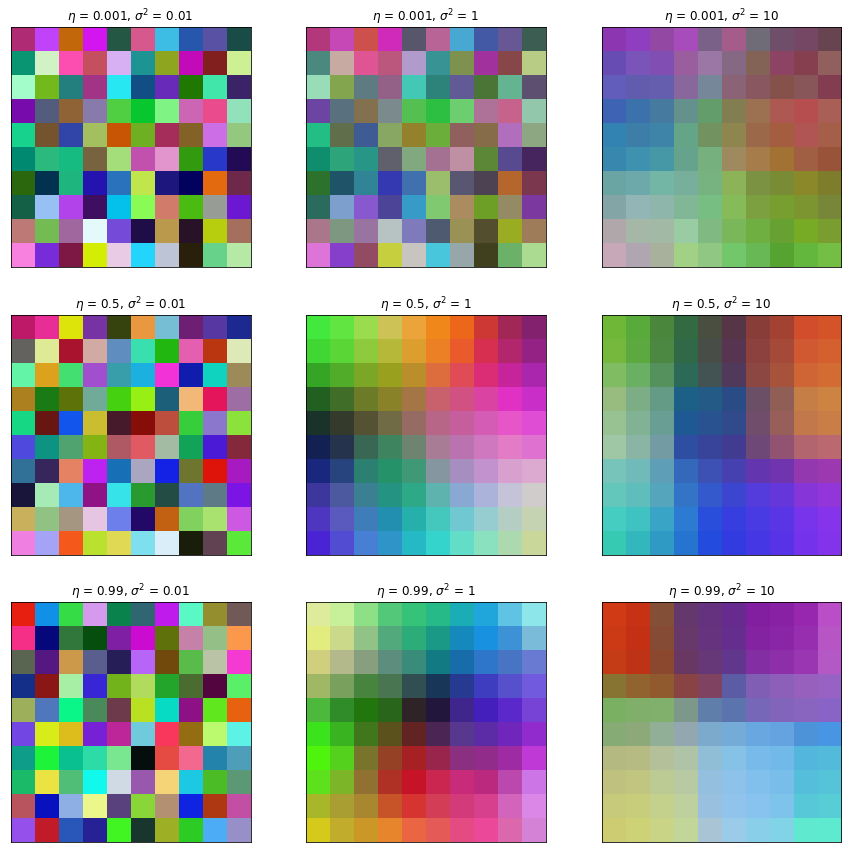

In [7]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Inicializar el SOM aleatoriamente al mismo estado

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.randint(0, 255, (m, n, 3)).astype(float)        
        SOM = train_SOM(SOM, train_data, epochs = 5,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))

El ejemplo anterior muestra que:

* Para valores de radio cercanos a cero (primera columna), el SOM solo cambia las celdas individuales pero no las celdas vecinas. Por lo tanto, no se crea un mapa adecuado independientemente de la tasa de aprendizaje. 

* También se encuentra un caso similar para tasas de aprendizaje más pequeñas (primera fila, segunda columna). 

* Al igual que con cualquier otro algoritmo de aprendizaje automático, **se requiere un buen equilibrio de parámetros para un entrenamiento ideal**.